In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

load temperature data (table) using the Package Pandas <br>
annual average temperature in Florida from 1895 to 2017 <br>
https://www.ncdc.noaa.gov/cag/statewide/time-series/8/tavg/12/12/1895-2018?base_prd=true&firstbaseyear=1895&lastbaseyear=2000

In [2]:
# load data from Florida_temp_mean_1895_2017.csv using pandas
meanTempDF = pd.read_csv('Florida_temp_mean_1895_2017.csv', sep=',')

In [3]:
# show data
meanTempDF

,Year,Temperature,Anomaly
0,1895,68.7,-1.4
1,1896,69.9,-0.2
2,1897,70.4,0.3
3,1898,70.1,0.0
4,1899,70.4,0.3
...,...,...,...
118,2013,71.7,1.6
119,2014,70.6,0.5
120,2015,73.4,3.3
121,2016,72.5,2.4


In [4]:
#show the first five rows
meanTempDF.head()

,Year,Temperature,Anomaly
0,1895,68.7,-1.4
1,1896,69.9,-0.2
2,1897,70.4,0.3
3,1898,70.1,0.0
4,1899,70.4,0.3


In [5]:
# get the 'Year' column and convert it into a numpy array
# save it in a variable called 'years'
years = meanTempDF['Year'].values
print(type(years))
print(years)



<class 'numpy.ndarray'>
[1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908
 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922
 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936
 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


NameError: name 'temps' is not defined

In [ ]:
# get the 'Temperature' column and convert it into a numpy array
# save it in a variable called 'temps'
temps = meanTempDF['Temperature'].values
print(type(temps))
print(temps)


correlation_matrix = np.corrcoef(years,temps)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

In [ ]:
# handle missing values in the table
# see the pdf for a hint
for i in range(temps.size):
    if np.isnan(temps[i]):
        temps[i] = (temps[i-1]+temps[i+1])/2

In [ ]:
# calculate the standard deviation 
sdTemps = np.std(temps)
print(sdTemps)

In [ ]:
# calculate the mean temperature
meanTemps = np.mean(temps)
print(meanTemps)

In [ ]:
# use .iloc[row,col] to get an element in the table
practiceElem = meanTempDF.iloc[106, 0]
practiceElem

In [6]:
# use .iloc to get a row of the table
# use .values to convert the row to a numpy array
row2001 = (meanTempDF.iloc[106, :]).values
print(row2001)

[2.001e+03 7.090e+01 8.000e-01]


In [7]:
# use .iloc to get a column of the table
# use .values to convert the column to a numpy array
colOfYears = (meanTempDF.iloc[:, 0]).values
colOfYears

array([1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017], dtype=int64)

### visualize the data using matplotlib

Text(0.5, 1.0, 'Average temperature in each year')

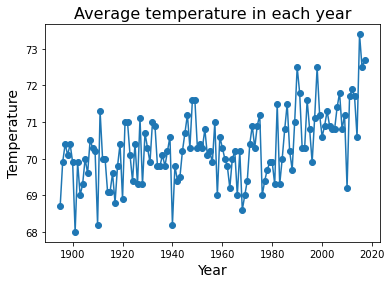

In [13]:
# plot the temperature history
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25


fig, ax1 = plt.subplots()
ax1.plot(colOfYears, temps, 'o-')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Temperature', fontsize=14)
ax1.set_title('Average temperature in each year', fontsize=16)

Text(0.5, 1.0, 'Average temperatures in last 120 years')

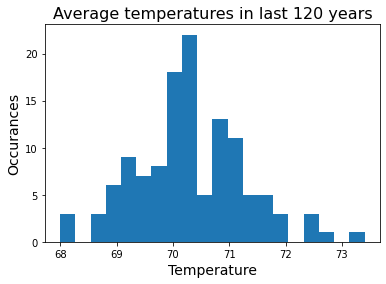

In [14]:
# show the histogram of the temperature values
fig, ax2 = plt.subplots()
ax2.hist(temps, bins=20)
ax2.set_xlabel('Temperature', fontsize=14)
ax2.set_ylabel('Occurances', fontsize=14)
ax2.set_title('Average temperatures in last 120 years', fontsize=16)


smooth the data, so we can see the trend clearly ... <br>
convolution kernel = [0.2, 0.2, 0.2, 0.2] <br>
try to use the convolve function in numpy

Text(0.5, 1.0, 'Average temperature in each year')

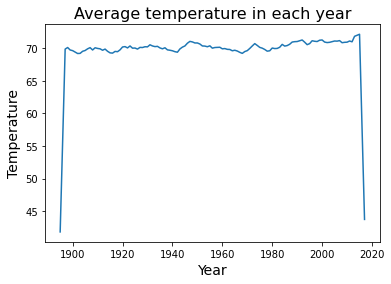

In [15]:
# smooth the temperature curve using moving average
convRefArray = np.array([0.2, 0.2, 0.2, 0.2, 0.2], dtype='float64')
smoothTemps = np.convolve(temps, convRefArray, mode="same")

fig, ax3 = plt.subplots()
ax3.plot(colOfYears, smoothTemps)
ax3.set_xlabel('Year', fontsize=14)
ax3.set_ylabel('Temperature', fontsize=14)
ax3.set_title('Average temperature in each year', fontsize=16)

np.convolve does not handle the start/end point very well <br>


Text(0.5, 1.0, 'Average temperature in each year')

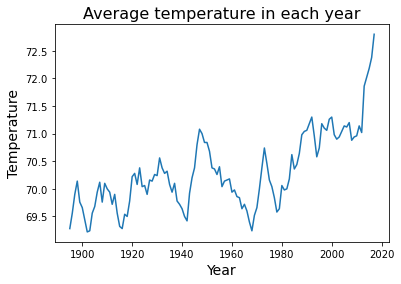

In [16]:
import scipy
import scipy.ndimage
# use the convolve function in the module ndimage of the package scipy
smoothTempsFixed = scipy.ndimage.convolve(temps, convRefArray, mode='nearest')

fig, ax4 = plt.subplots()
ax4.plot(colOfYears, smoothTempsFixed)
ax4.set_xlabel('Year', fontsize=14)
ax4.set_ylabel('Temperature', fontsize=14)
ax4.set_title('Average temperature in each year', fontsize=16)

(1890.0, 2025.0, 67.0, 74.0)

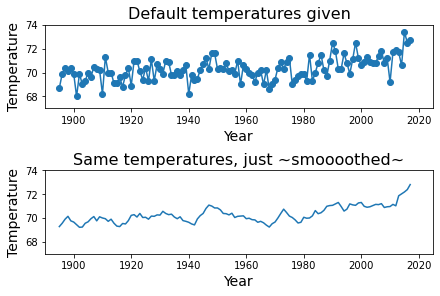

In [17]:
# plot both to show the differences
fig, ax5 = plt.subplots(2, 1, constrained_layout=True)
ax5[0].plot(colOfYears, temps, 'o-')
ax5[0].set_xlabel('Year', fontsize=14)
ax5[0].set_ylabel('Temperature', fontsize=14)
ax5[0].set_title('Default temperatures given', fontsize=16)
ax5[0].axis([1890, 2025, 67, 74])

ax5[1].plot(colOfYears, smoothTempsFixed)
ax5[1].set_xlabel('Year', fontsize=14)
ax5[1].set_ylabel('Temperature', fontsize=14)
ax5[1].set_title('Same temperatures, just ~smoooothed~', fontsize=16)
ax5[1].axis([1890, 2025, 67, 74])

(1890.0, 2025.0, 67.0, 74.0)

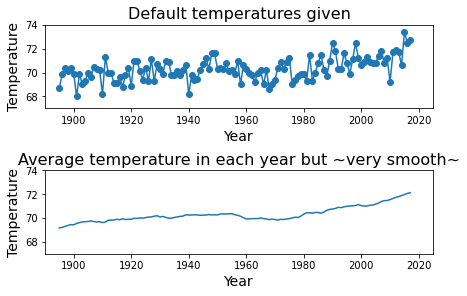

In [18]:
# use a larger kernel with 21 numbers
# plot results
largerConvRef = np.zeros(21, dtype='float64')
largerConvRef.fill(1/21)

evenSmootherTempsFixed = scipy.ndimage.convolve(temps, largerConvRef, mode='nearest')


fig, ax6 = plt.subplots(2, 1, constrained_layout=True)
ax6[0].plot(colOfYears, temps, 'o-')
ax6[0].set_xlabel('Year', fontsize=14)
ax6[0].set_ylabel('Temperature', fontsize=14)
ax6[0].set_title('Default temperatures given', fontsize=16)
ax6[0].axis([1890, 2025, 67, 74])

ax6[1].plot(colOfYears, evenSmootherTempsFixed)
ax6[1].set_xlabel('Year', fontsize=14)
ax6[1].set_ylabel('Temperature', fontsize=14)
ax6[1].set_title('Average temperature in each year but ~very smooth~', fontsize=16)
ax6[1].axis([1890, 2025, 67, 74])


In [19]:
# add a new column to the table, and it contains a 'Smoothed_signal'
meanTempDF['Smoothed_signal'] = evenSmootherTempsFixed
meanTempDF

,Year,Temperature,Anomaly,Smoothed_signal
0,1895,68.7,-1.4,69.171429
1,1896,69.9,-0.2,69.214286
2,1897,70.4,0.3,69.300000
3,1898,70.1,0.0,69.376190
4,1899,70.4,0.3,69.447619
...,...,...,...,...
118,2013,71.7,1.6,71.790476
119,2014,70.6,0.5,71.876190
120,2015,73.4,3.3,71.966667
121,2016,72.5,2.4,72.057143


In [24]:
# save the new table (dataframe) to a .csv file
meanTempDF.to_csv('./test_csv_download.csv', encoding='utf-8', sep=',')
#It actually works thats so crazy!!!!